I was interested in looking at the average age for each outcome. I assumed that younger animals would be more likely to be adopted. 

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns

In [2]:
shelterdframe = pd.read_csv('aac_intakes_outcomes.csv')

In [3]:
ages = []
for age in shelterdframe['age_upon_outcome_(days)']:
    number = age/365
    ages.append(number)


shelterdframe['number_age_years']= ages

In [4]:
avg_age_by_outcome = shelterdframe['number_age_years'].groupby(shelterdframe['outcome_type']).mean()

In [5]:
avg_age_by_outcome

outcome_type
Adoption           1.678934
Died               1.490026
Disposal           1.169656
Euthanasia         2.505810
Missing            1.624955
Relocate           0.941553
Return to Owner    3.949087
Rto-Adopt          3.361904
Transfer           1.603294
Name: number_age_years, dtype: float64

From these averages, you can see the highest average age is seen in animals that are euthanized. This makes sense as animals are more prone to health complications with age. The lowest average age is seen in animals that were being relocated. It is interesting that adoption is similar or slightly higher than many other categories. There are many things that could lead to this type of result. It is possible that there would be many more adult dogs being taken into the shelter than puppies. This would then influence the average age making it higher. I think to really look into this question, I will need to separate the animals by age category(exp. puppy,adult) and then look at the distrubition of outcome types within each group. 

In [6]:
dogs_only = shelterdframe.loc[shelterdframe['animal_type'] == 'Dog']

In [11]:
dogs_only['age_category'] = ["Puppy" if i < 1.0 else "Adult" for i in dogs_only['number_age_years']]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
dogs_only.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,number_age_years,age_category
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,10.0,Adult
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,7.0,Adult
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,6.0,Adult
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,10.0,Adult
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,16.0,Adult


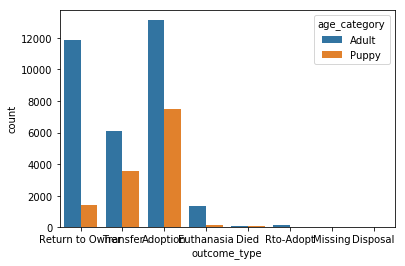

In [17]:
sns.countplot('outcome_type',data=dogs_only,hue='age_category')